1.14.0
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
9
Epoch 1/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4974 - acc: 0.8244
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3770 - acc: 0.8634
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3378 - acc: 0.8768
Epoch 4/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3131 - acc: 0.8854
Epoch 5/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2965 - acc: 0.8901
Epoch 6/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2816 - acc: 0.8961
Epoch 7/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2704 - acc: 0.8999
Epoch 8/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2608 - acc: 0.9039
Epoch 9/10
60000/60000 [=========

[0.3458343650817871, 0.8775]

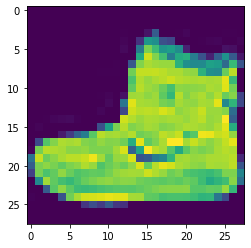

In [29]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

# Printing the versions of tensorflow
print(tf.__version__)

# Loading the data : Fashion MNIST (available from keras datasets)
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_label), (test_images, test_label) = fashion_mnist.load_data()
print(type(train_images), type(train_label))
print(train_images.shape, train_label.shape)
print(test_images.shape, test_label.shape)
print(np.unique(train_label))
print(np.unique(test_label))

# Printing some of the data
np.set_printoptions(linewidth = 200)
plt.imshow(train_images[0])
print(train_label[0])

# Normalization of the pixel values
maxpixel = np.max([np.max(train_images), np.max(test_images)])
train_images = train_images/float(maxpixel)
test_images = test_images/float(maxpixel)

# Defining the model for computer vision
# The inputs are images of shape 28X28,and need to be flattened.
# The outcome labels can take 10 values, refering to 10 different types of clothing item. 

model = tf.keras.models.Sequential([
        keras.layers.Flatten(input_shape =(28,28)),
        keras.layers.Dense(units = 128, activation = tf.nn.relu),
        keras.layers.Dense(units = 10, activation = tf.nn.softmax)
        ])

# Compiling the model
model.compile(optimizer = tf.keras.optimizers.Adam(), 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


# Training the model
model.fit(train_images, train_label, epochs = 10)

# Evaluating the model on the test data
model.evaluate(test_images, test_label)




In [37]:
## Implementing callbacks in the training
# This would help us stop the training as soon as we see manually that the loss/accruacy has taken a certain value

import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(1.0-logs.get('accuracy')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
        

Epoch 1/10
59968/60000 [============================>.] - ETA: 0s - loss: 0.4750 - acc: 0.8303

TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

## Week 2 Assignment: Handwriting Recognition

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from os import path, getcwd, chdir
